##Importando bibliotecas##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

##Carregando base de dados##

In [2]:
df = pd.read_csv("https://github.com/lucasvitorsr/Analise-da-criminalidade-no-Estado-de-Sao-Paulo/blob/main/Bases%20de%20dados/ssp.csv?raw=true")

##Primeiras impressões dos dados##

In [ ]:
df.shape

(153876, 27)

In [ ]:
df.sample(5)

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
128347,2018,8,3518008,São José do Rio Preto,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35315,2003,12,3523305,Santos,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,3.0,NaN,0.0,0.0,0.0,20.0,0.0
103446,2016,7,3532207,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,5.0,0.0
43585,2012,2,3518305,Grande São Paulo (exclui a Capital),0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,21.0,1.0
84621,2014,10,3500105,Presidente Prudente,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,1.0,0.0,0.0,22.0,1.0


Municipios representados por códigos, necessário fazer uma alteração para explicitar os municípios.

In [ ]:
df.describe()

,ano,mes,id_municipio,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,tentativa_de_homicidio,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
count,153876.000000,153876.000000,1.538760e+05,151296.000000,151296.000000,143700.000000,143700.000000,151296.000000,151296.000000,151296.000000,...,151296.000000,35988.000000,43680.000000,151296.000000,35988.000000,151296.000000,151296.000000,151296.000000,151296.000000,151296.000000
mean,2011.503158,6.500000,3.528670e+06,0.671558,0.711526,0.003292,0.004036,0.541878,0.032089,0.745281,...,1.057397,0.396688,0.966003,32.460039,31.959264,9.314311,0.025176,0.924089,66.754019,13.507456
std,5.771254,3.452064,1.673251e+04,6.784264,7.214758,0.069767,0.091217,2.363979,0.322086,5.398951,...,7.299465,2.693445,5.725064,427.796418,444.889097,126.973193,0.487330,14.084669,598.922563,153.603132
min,2002.000000,1.000000,3.500105e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.750000,3.514502e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2012.000000,6.500000,3.528502e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
75%,2017.000000,9.250000,3.543238e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,35.000000,2.000000
max,2021.000000,12.000000,3.557303e+06,474.000000,499.000000,8.000000,11.000000,91.000000,33.000000,288.000000,...,329.000000,103.000000,218.000000,14927.000000,14337.000000,5082.000000,34.000000,655.000000,25063.000000,5296.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153876 entries, 0 to 153875
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   ano                                                             153876 non-null  int64  
 1   mes                                                             153876 non-null  int64  
 2   id_municipio                                                    153876 non-null  int64  
 3   regiao_ssp                                                      153876 non-null  object 
 4   homicidio_doloso                                                151296 non-null  float64
 5   numero_de_vitimas_em_homicidio_doloso                           151296 non-null  float64
 6   homicidio_doloso_por_acidente_de_transito                       143700 non-null  float64
 7   numero_de_vitimas_em_homicidio_doloso_

* Colunas roubo_outros, estupro e estupro_de_vulneravel com grande número de valores nulos, é necessário descartar essas colunas.
* Meses representados por inteiros, talvez seja necessário converter para texto para se obter uma melhor análise exproratória.

In [ ]:
df.isnull().sum()

ano                                                                    0
mes                                                                    0
id_municipio                                                           0
regiao_ssp                                                             0
homicidio_doloso                                                    2580
numero_de_vitimas_em_homicidio_doloso                               2580
homicidio_doloso_por_acidente_de_transito                          10176
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito     10176
homicidio_culposo_por_acidente_de_transito                          2580
homicidio_culposo_outros                                            2580
tentativa_de_homicidio                                              2580
lesao_corporal_seguida_de_morte                                    48648
lesao_corporal_dolosa                                               2580
lesao_corporal_culposa_por_acidente_de_transito    

* Mesmo número de valores nulos para várias colunas, é necessário investigar isso

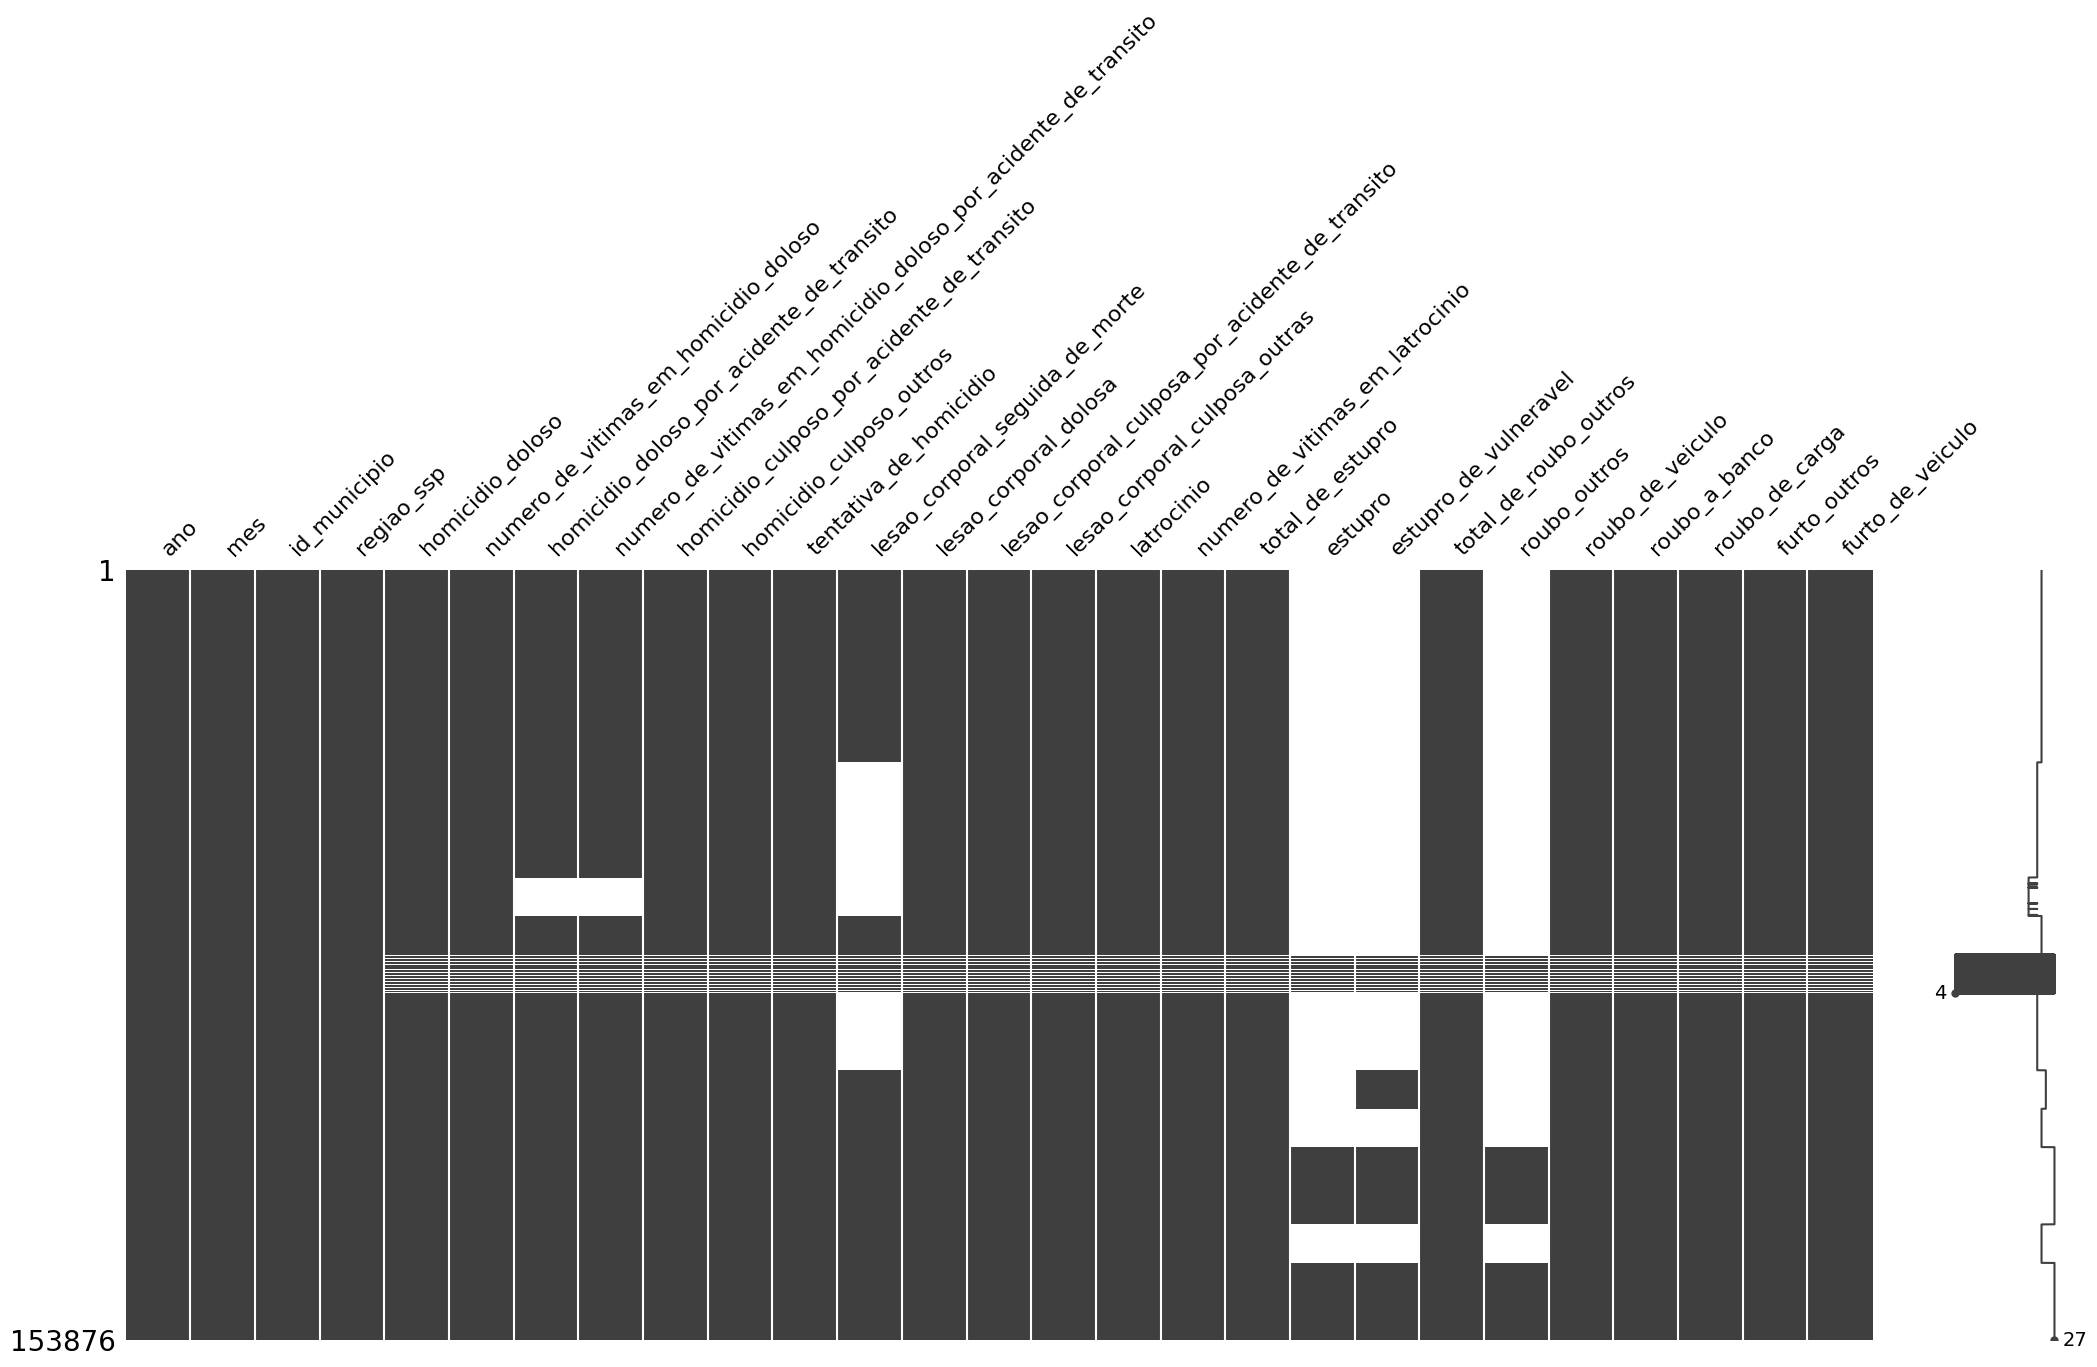

In [ ]:
msno.matrix(df)
plt.show()

* Valores nulos agrupados(linhas brancas horizontais), podendo ser devido a um ano, mês, município ou região.

In [ ]:
anos = sorted(df["ano"].unique())
print("Valores nulos por ano")
for ano in anos:
  print(ano, ": ", df[df["ano"] == ano].shape[0], "Ocorrencias")
  print(df[df["ano"] == ano].isnull().sum())
  print()

Valores nulos por ano
2002 :  7716 Ocorrencias
ano                                                                  0
mes                                                                  0
id_municipio                                                         0
regiao_ssp                                                           0
homicidio_doloso                                                     0
numero_de_vitimas_em_homicidio_doloso                                0
homicidio_doloso_por_acidente_de_transito                            0
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito       0
homicidio_culposo_por_acidente_de_transito                           0
homicidio_culposo_outros                                             0
tentativa_de_homicidio                                               0
lesao_corporal_seguida_de_morte                                      0
lesao_corporal_dolosa                                                0
lesao_corporal_culposa_por_aci

* Ano 2021 com muitos valores nulos para todas as colunas, pode ser um mes especifico;
* estupro, estupro_de_vulneravel e roubo_outros com quase 100% dos valores sendo nulos até 2016;
* lesao_corporal_seguida_de_morte com quase 100% dos valores sendo nulos de 2010 a 2015, logo irei excluir essa coluna;
* homicidio_doloso_por_acidente_de_transito e numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito com valores faltantes apenas em 2011, irei preencher esses valores com as médias com a combinação de mês e município.

In [ ]:
meses = sorted(df["mes"].unique())
print("Valores nulos por mes no ano de 2021")
df_2021 = df[df["ano"] == 2021]
for mes in meses:
  print(mes, ": ", df_2021[df["mes"] == mes].shape[0], "Ocorrencias")
  print(df[df["mes"] == mes].isnull().sum())
  print()

Valores nulos por mes no ano de 2021
1 :  645 Ocorrencias
ano                                                                  0
mes                                                                  0
id_municipio                                                         0
regiao_ssp                                                           0
homicidio_doloso                                                     0
numero_de_vitimas_em_homicidio_doloso                                0
homicidio_doloso_por_acidente_de_transito                          633
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito     633
homicidio_culposo_por_acidente_de_transito                           0
homicidio_culposo_outros                                             0
tentativa_de_homicidio                                               0
lesao_corporal_seguida_de_morte                                   3839
lesao_corporal_dolosa                                                0
lesao_corporal_culp

* Padrão de valores nulos presente a partir de setembro. Como esse padrão presiste em mais de um mês, irei descartar o ano 2021.

## Tratamento de valores nulos

Descartando roubo_outros, estupro, estupro_de_vulneravel e lesao_corporal_seguida_de_morte

In [ ]:
colunas = ["roubo_outros", "estupro", "estupro_de_vulneravel", "lesao_corporal_seguida_de_morte"]
df.drop(colunas, axis = 1, inplace = True)

Excluindo dados do ano 2021

In [ ]:
df = df.loc[~(df["ano"] == 2021)]

Preenchendo valores faltantes de homicidio_doloso_por_acidente_de_transito e numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito no ano 2011 com a combinação de mês e município

In [ ]:
df[["homicidio_doloso_por_acidente_de_transito", "numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito"]].describe()

,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito
count,138540.000000,138540.000000
mean,0.003385,0.004150
std,0.070849,0.092626
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,8.000000,11.000000


In [ ]:
coluna1 = "homicidio_doloso_por_acidente_de_transito"
coluna2 = "numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito"

# Calcula a média para cada combinação de "id_municipio" e "mes"
df["media_coluna1"] = df.groupby(["id_municipio", "mes"])[coluna1].transform("mean")
df["media_coluna2"] = df.groupby(["id_municipio", "mes"])[coluna2].transform("mean")

# Preenche os valores nulos nas colunas
df[coluna1].fillna(df["media_coluna1"], inplace = True)
df[coluna2].fillna(df["media_coluna2"], inplace = True)

# Remove as colunas auxiliares
df = df.drop(["media_coluna1", "media_coluna2"], axis = 1)

In [ ]:
df[["homicidio_doloso_por_acidente_de_transito", "numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito"]].describe()

,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito
count,146136.000000,146136.000000
mean,0.003328,0.004086
std,0.069040,0.090275
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,8.000000,11.000000


irei aceitar essas pequenas variações nas médias durante o preenchimento de valores nulos, pois busca-se equilibrar a simplicidade da abordagem com a obtenção de informações úteis na fase inicial da análise exploratória. Essa decisão é alinhada com o objetivo principal de compreender os dados e derivar insights relevantes.

In [ ]:
df.isnull().sum()

ano                                                               0
mes                                                               0
id_municipio                                                      0
regiao_ssp                                                        0
homicidio_doloso                                                  0
numero_de_vitimas_em_homicidio_doloso                             0
homicidio_doloso_por_acidente_de_transito                         0
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito    0
homicidio_culposo_por_acidente_de_transito                        0
homicidio_culposo_outros                                          0
tentativa_de_homicidio                                            0
lesao_corporal_dolosa                                             0
lesao_corporal_culposa_por_acidente_de_transito                   0
lesao_corporal_culposa_outras                                     0
latrocinio                                      

Verificando a existência de linhas duplicadas

In [ ]:
df.duplicated().any()

False

## Associando o id_municipio aos respectivos municípios

Para fazer isso, farei um merge com um dataset do IBGE que possui os códigos e municípios associados.

In [ ]:
df_id = pd.read_excel("https://github.com/lucasvitorsr/Analise-da-criminalidade-no-Estado-de-Sao-Paulo/blob/main/Bases%20de%20dados/COMPOSICAO_BRASIL_MUNICIPIO_2020.xlsx?raw=true")

In [ ]:
df_id.head()

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [ ]:
df_id.rename(columns = {"Código Município Completo" : "id_municipio"}, inplace = True)

In [ ]:
df = pd.merge(df, df_id[["id_municipio", "Nome_Município"]], on = "id_municipio")

In [ ]:
df.head()

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,latrocinio,numero_de_vitimas_em_latrocinio,total_de_estupro,total_de_roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo,Nome_Município
0,2002,1,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,Adamantina
1,2002,2,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,Adamantina
2,2002,3,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,Adamantina
3,2002,4,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,0.0,Adamantina
4,2002,5,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0,0.0,Adamantina


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146136 entries, 0 to 146135
Data columns (total 24 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   ano                                                             146136 non-null  int64  
 1   mes                                                             146136 non-null  int64  
 2   id_municipio                                                    146136 non-null  int64  
 3   regiao_ssp                                                      146136 non-null  object 
 4   homicidio_doloso                                                146136 non-null  float64
 5   numero_de_vitimas_em_homicidio_doloso                           146136 non-null  float64
 6   homicidio_doloso_por_acidente_de_transito                       146136 non-null  float64
 7   numero_de_vitimas_em_homicidio_doloso_

In [ ]:
df.to_csv("ssp_processada.csv", index = False)